# MNIST in TF1
---


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

# 1. Import Data Set

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data 
mnist = input_data.read_data_sets("input/data/",one_hot = True)

## Checking the data

In [4]:
mnist.train.images.shape

(55000, 784)

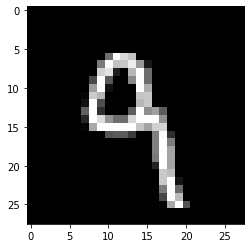

In [5]:
imagedemo = np.reshape(mnist.train.images[24,:],(28,28))
plt.imshow(imagedemo,cmap='gray')

In [6]:
def print_image(img):
  s = '\n'.join([''.join(['{:4}'.format(int(round(item * 255))) for item in row]) for row in img])
  print(s)

print_image(imagedemo)

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 108 254 215 196   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 121 252 194 199 238 152  24   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 209 226  31   0 182 254 109   0   0   0   0   0   0   0   0

# 2. Set up the architecture 

In [ ]:
def neural_network_model(
    n_nodes_input = 784,
    n_nodes_hl1 = 500,
    n_nodes_hl2 = 500,
    n_nodes_hl3 = 500,
    n_classes = 10

    ):
    
    # Input & Output
    # placeholders, data that we pass to the network, and validate parameters
    # None because we don't specify the batch size 
    x = tf.placeholder('float',[None,n_nodes_input])
    y = tf.placeholder('float')


    # Declare Variables (weights & Bias)
    hidden_layer1 = {'weights':tf.Variable(tf.random_normal([n_nodes_input,n_nodes_hl1])),
                     'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_layer2 = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1,n_nodes_hl2])),
                     'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_layer3 = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2,n_nodes_hl3])),
                     'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}
    
    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3,n_classes])),
                     'biases':tf.Variable(tf.random_normal([n_classes]))}


    # Declare the Architecture 
    l1 = tf.add(tf.matmul(x,hidden_layer1['weights']),hidden_layer1['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_layer2['weights']),hidden_layer2['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_layer3['weights']),hidden_layer3['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.add(tf.matmul(l3,output_layer['weights']),output_layer['biases'])


    # Declare Cost Function & Optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output,labels = y))
    optimizer = tf.train.AdamOptimizer().minimize(cost)


    #Return only the declaration of the network components, they're used for TF
    return dict(
        x=x,
        y=y,
        output=output,
        cost=cost,
        optimizer=optimizer
    )


neural_network_model()

# 3. Training & Testing Function 

In [8]:
def train_neural_network(DNN,epochs = 10,batch_size = 100):
  #All tf operations run inside a session
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) #async 
    for epoch in range(epochs):
      epoch_loss = 0
      for _ in range(int(mnist.train.num_examples/batch_size)):
        epoch_x,epoch_y = mnist.train.next_batch(batch_size)
        feed_dict = {DNN["x"]:epoch_x,DNN["y"]:epoch_y}
        _,c,prediction,y = sess.run([DNN['optimizer'],DNN['cost'],
                                     DNN['output'],DNN['y']],
                                    feed_dict = feed_dict)
        epoch_loss += c
      print('Epoch',epoch,'completed out of',epochs,'loss:',epoch_loss)

    #TESTING WITH VALUES NOT SEEN 
    #not passing the optimzer don't change the variables
    prediction,y = sess.run([DNN['output'],DNN['y']],feed_dict={DNN['x']:mnist.test.images,DNN['y']:mnist.test.labels})
    correct = tf.equal(tf.argmax(prediction,1),tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct,'float'))
    print('Accuracy:',accuracy.eval())




DNN = neural_network_model()
train_neural_network(DNN)

Epoch 0 completed out of 10 loss: 1524437.792755127
Epoch 1 completed out of 10 loss: 365140.3566017151
Epoch 2 completed out of 10 loss: 193134.44923305511
Epoch 3 completed out of 10 loss: 114508.72091591358
Epoch 4 completed out of 10 loss: 69179.38691204786
Epoch 5 completed out of 10 loss: 44747.30611246022
Epoch 6 completed out of 10 loss: 28086.78779780239
Epoch 7 completed out of 10 loss: 20720.39835165441
Epoch 8 completed out of 10 loss: 20773.15589890063
Epoch 9 completed out of 10 loss: 18109.92438607119
Accuracy: 0.9516
